In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
labels = ['vsync_60', 'no_vsync_60', 'vsync_500', 'no_vsync_500']

In [3]:
PATH_VSYNC_60 = "../data/vsync_on_60hz"
PATH_NO_VSYNC_60 = "../data/vsync_off_60hz"
PATH_VSYNC_500 = "../data/vsync_on_500hz"
PATH_NO_VSYNC_500 = "../data/finals_frameworks"

PATHS = [PATH_VSYNC_60, PATH_NO_VSYNC_60, PATH_VSYNC_500, PATH_NO_VSYNC_500]

In [4]:
files_vsync_60 = os.listdir(PATH_VSYNC_60)
files_vsync_60 = [x for x in files_vsync_60 if 'csv' in x]

files_no_vsync_60 = os.listdir(PATH_NO_VSYNC_60)
files_no_vsync_60 = [x for x in files_no_vsync_60 if 'csv' in x]

files_vsync_500 = os.listdir(PATH_VSYNC_500)
files_vsync_500 = [x for x in files_vsync_500 if 'csv' in x]

files_no_vsync_500 = os.listdir(PATH_NO_VSYNC_500)
files_no_vsync_500 = [x for x in files_no_vsync_500 if 'csv' in x]

files = [files_vsync_60, files_no_vsync_60, files_vsync_500, files_no_vsync_500]

In [5]:
data_dict = {}
for i, f in enumerate(files):
    file_data = []
    for file in f:
        data_in = pd.read_csv(f"{PATHS[i]}/{file}", index_col=False)
        file_data.append(data_in)
        
    data = pd.concat(file_data)
    data_dict[labels[i]] = data

data_dict[labels[0]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61405,64409,11513,49892
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66421,69780,16373,50048
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53293,56644,20275,33018
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66216,69579,16273,49943
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59661,63011,9659,50002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,59871,63395,27481,32390
196,196,196,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,52629,56154,20211,32418
197,197,197,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,60903,64429,28421,32482
198,198,198,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,61043,64393,28504,32539


In [6]:
for key, value in data_dict.items():
    value = value[value['complexity'] == 'default']
    value = value[value['program'] != 'bitblt']
    value = value[value['program'] != 'getdbits']
    value = value[value['fullscreen'] == 'fullscreen']

data_dict[labels[0]]['vsync'] = 1
data_dict[labels[1]]['vsync'] = 0
data_dict[labels[2]]['vsync'] = 1
data_dict[labels[3]]['vsync'] = 0

data_dict[labels[0]]['refresh_rate'] = 60
data_dict[labels[1]]['refresh_rate'] = 60
data_dict[labels[2]]['refresh_rate'] = 500
data_dict[labels[3]]['refresh_rate'] = 500

In [7]:
data_dict[labels[0]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61405,64409,11513,49892,1,60
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66421,69780,16373,50048,1,60
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53293,56644,20275,33018,1,60
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66216,69579,16273,49943,1,60
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59661,63011,9659,50002,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,59871,63395,27481,32390,1,60
196,196,196,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,52629,56154,20211,32418,1,60
197,197,197,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,60903,64429,28421,32482,1,60
198,198,198,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,61043,64393,28504,32539,1,60


In [8]:
data_dict[labels[1]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60881,64234,12680,48201,0,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67081,70260,16949,50132,0,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64345,67699,14284,50061,0,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63791,67134,13820,49971,0,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63467,66829,13552,49915,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,53697,57314,21255,32442,0,60
196,196,196,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,62728,66077,29786,32942,0,60
197,197,197,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,54770,58121,22128,32642,0,60
198,198,198,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,56095,59718,23580,32515,0,60


In [9]:
data_dict[labels[2]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12155,14298,5764,6391,1,500
1,1,1,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11283,13427,5075,6208,1,500
2,2,2,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11643,13786,5308,6335,1,500
3,3,3,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11470,13783,5343,6127,1,500
4,4,4,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11799,13941,5544,6255,1,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,6981,9302,4000,2981,1,500
196,196,196,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,8713,11037,5740,2973,1,500
197,197,197,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,8365,10686,5307,3058,1,500
198,198,198,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,5941,8439,3058,2883,1,500


In [10]:
# remove unwanted complexities and programs
data_temp = data_dict[labels[3]]
data_temp = data_temp[data_temp['program'] != 'bitblt']
data_temp = data_temp[data_temp['program'] != 'getdbits']
data_temp = data_temp[data_temp['complexity'] == 'default']
data_temp = data_temp[data_temp['fullscreen'] == 'fullscreen']
data_dict[labels[3]] = data_temp
data_dict[labels[3]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11810,14128,5701,6109,0,500
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12160,14305,6129,6031,0,500
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,13260,4799,5973,0,500
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11461,13775,5455,6006,0,500
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,12916,7094,3678,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8009,10332,4494,3515,0,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8011,10335,4916,3095,0,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7496,9646,4322,3174,0,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7330,9647,4029,3301,0,500


In [11]:
data = pd.concat([data_dict[labels[0]], data_dict[labels[1]], data_dict[labels[2]], data_dict[labels[3]]])
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61.405,64.409,11.513,49.892,1,60
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66.421,69.780,16.373,50.048,1,60
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53.293,56.644,20.275,33.018,1,60
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66.216,69.579,16.273,49.943,1,60
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59.661,63.011,9.659,50.002,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.009,10.332,4.494,3.515,0,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.011,10.335,4.916,3.095,0,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.496,9.646,4.322,3.174,0,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.330,9.647,4.029,3.301,0,500


# Which frameworks have active VSYNC?

In [12]:
vsync_off_frameworks = {}
for framework in data['framework'].unique():
    data_fw = data[data['framework'] == framework]
    vsync_counter= len(data_fw[data_fw['ete_upper'] > data_fw['ete_lower']])
    if vsync_counter > 0:
        vsync_off_frameworks[framework] = vsync_counter
print(vsync_off_frameworks)

{'Direct2D': 7, 'Direct3D': 326, 'GLEW': 228, 'GTK': 564, 'Java2D': 569, 'JavaSwing': 560, 'pygame': 200, 'pyglet': 373, 'pyqt6_quick': 560, 'SDL2_Direct3D': 566, 'SDL2_OpenGLES': 565, 'SDL2_OpenGL': 569, 'SFML': 230, 'Skia': 195}


In [13]:
vsyc_off_df = pd.DataFrame([vsync_off_frameworks])
vsyc_off_df.T

,0
Direct2D,7
Direct3D,326
GLEW,228
GTK,564
Java2D,569
JavaSwing,560
pygame,200
pyglet,373
pyqt6_quick,560
SDL2_Direct3D,566


# Plot 

In [14]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_NONE = '#8E8E8D'

FRAMEWORK_ORDER = ['WinUI', 'WinAPI', 'GDIplus', 'Direct3D', 'Direct2D', 'Blend2D', 'Cairo', 'FLTK', 'Java2D', 'JavaSwing','Qt5', 'Qt6', 'pyqt5', 'pyqt6', 'pyqt6_quick', 'tkinter', 'wxpython', 'wxpython_d2d', 'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SDL2_Software', 'pygame', 'pyglet', 'GTK', 'GLUT', 'GLEW', 'SFML', 'Skia']

In [15]:
# remove negative diff, failed validation
data = data[data['diff'] > 0]  

# remove absolute outliers
data = data.loc[~((data['framework'] == 'GDIplus') & (data['program'] == 'getpixel') & (data['diff'] > 7))] 
data = data.loc[~((data['framework'] == 'Skia') & (data['program'] == 'windup') & (data['diff'] < 0))] 

# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
data = data.loc[~((data['framework'] == 'GTK') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'pyglet') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'Java2D') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'JavaSwing') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pygame') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pyqt6_quick') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'SDL2_Direct3D') & (data['program'] == 'windup'))]

In [16]:
data_filtered = data[data['framework'].isin(vsync_off_frameworks)]
data_filtered

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,47.129,50.480,14.530,32.599,1,60
1,1,1,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,42.108,45.455,9.179,32.929,1,60
2,2,2,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,46.408,49.762,1.342,45.066,1,60
3,3,3,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,50.203,53.727,1.302,48.901,1,60
4,4,4,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,41.926,45.278,8.916,33.010,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2311,Skia,default,Skia_default,fullscreen,3.0,windup,7.497,7.753,3.525,3.972,0,500
196,196,196,2311,Skia,default,Skia_default,fullscreen,3.0,windup,6.632,6.889,2.888,3.744,0,500
197,197,197,2311,Skia,default,Skia_default,fullscreen,3.0,windup,6.634,6.891,2.846,3.788,0,500
198,198,198,2311,Skia,default,Skia_default,fullscreen,3.0,windup,8.534,8.620,3.230,5.304,0,500


In [17]:
FRAMEWORK_ORDER_FILTERED = [x for x in FRAMEWORK_ORDER if x in vsync_off_frameworks.keys()]

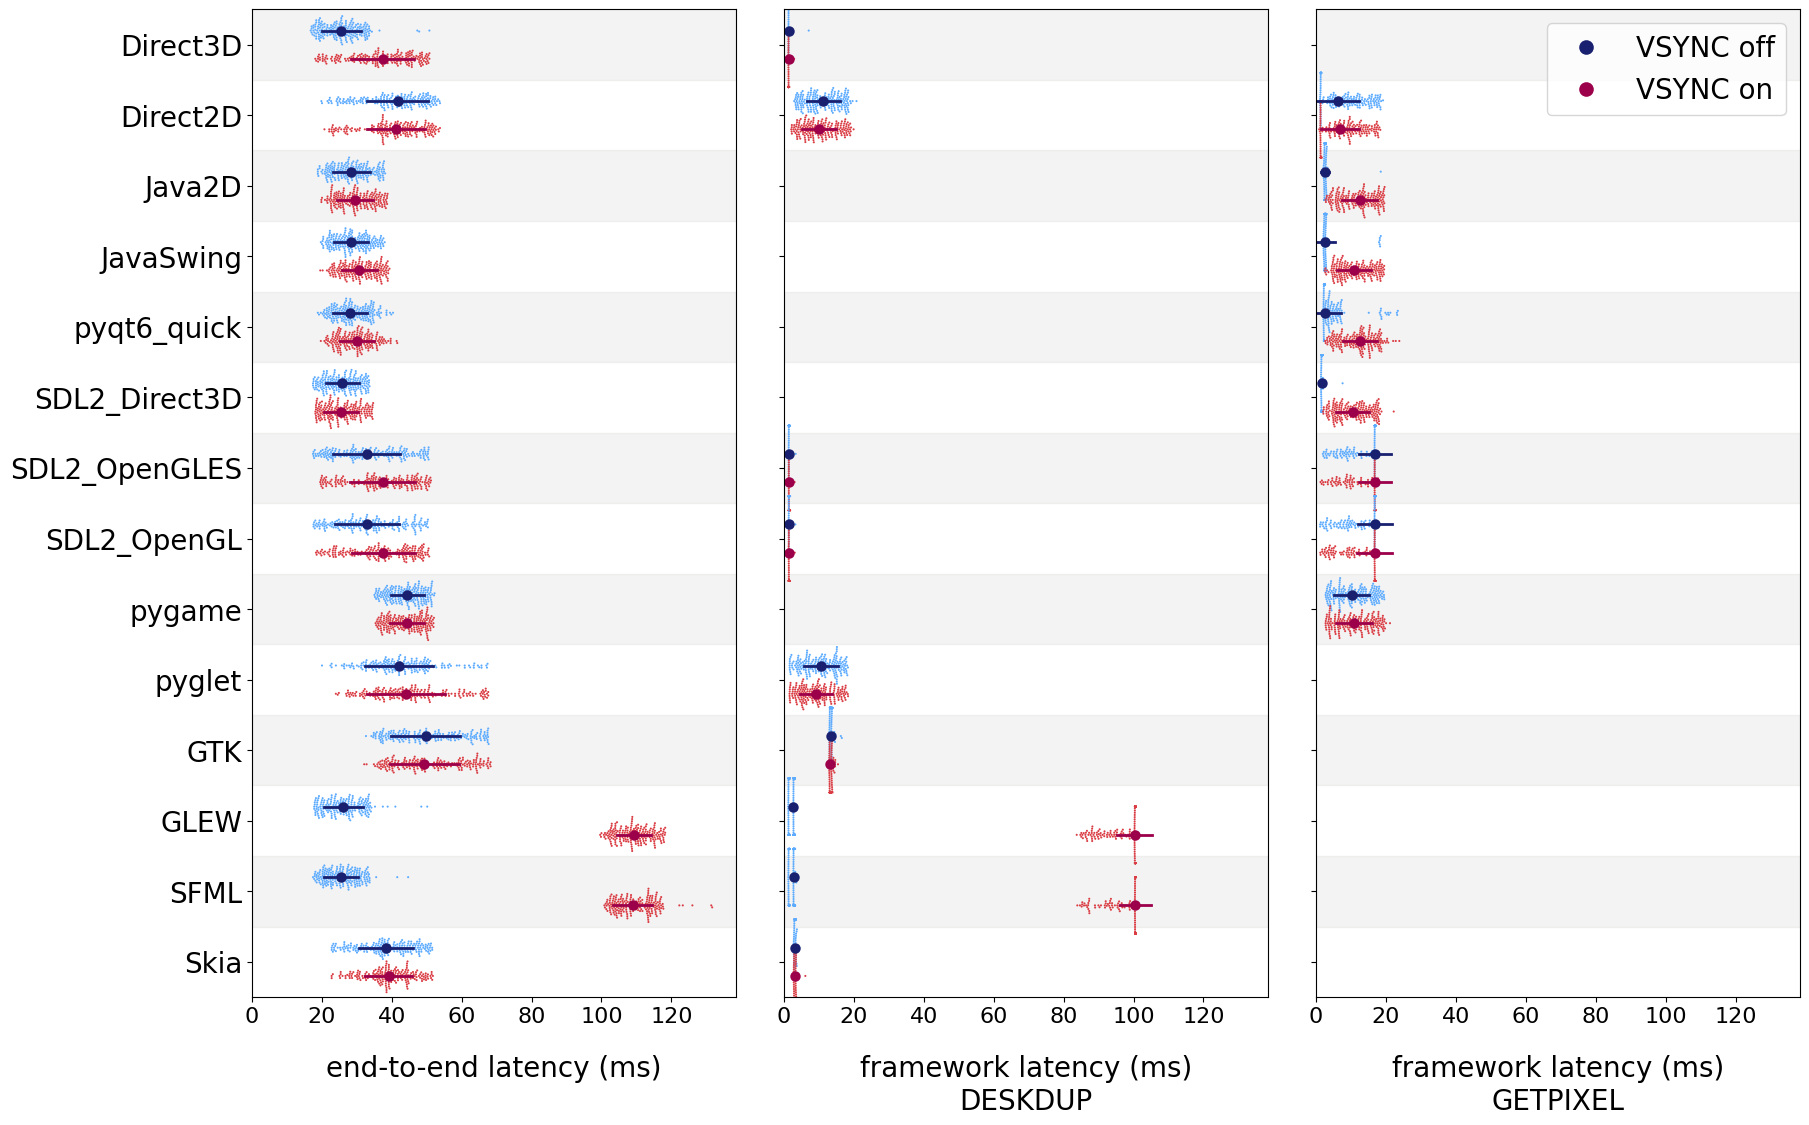

In [18]:
data_temp = data_filtered[data_filtered['refresh_rate'] == 60]

fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

# stripped background
for i in range(len(data_temp['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
legend.get_texts()[0].set_text('VSYNC off')
legend.get_texts()[1].set_text('VSYNC on')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("./figures/vsync_60hz.pdf", format='pdf', bbox_inches='tight')

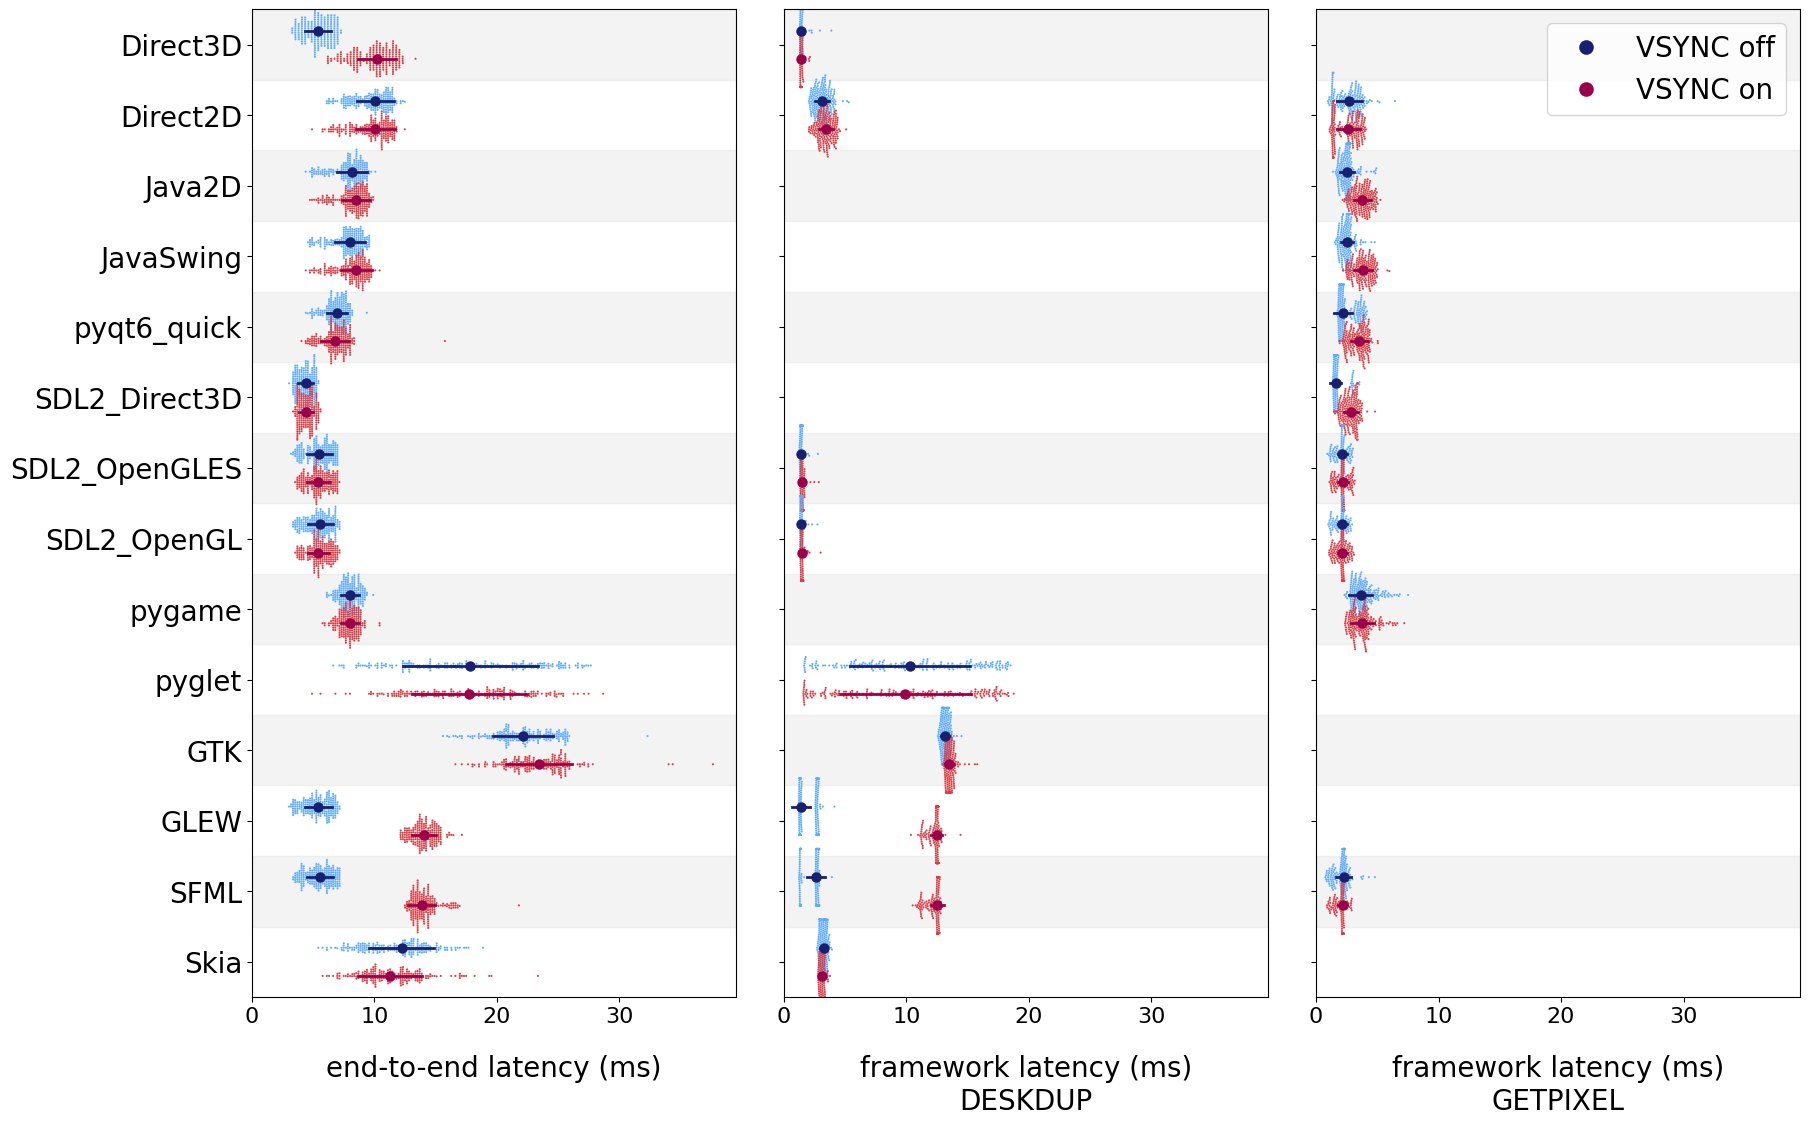

In [19]:
data_temp = data_filtered[data_filtered['refresh_rate'] == 500]

fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

# stripped background
for i in range(len(data_temp['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER_FILTERED, hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2, linewidth=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
legend.get_texts()[0].set_text('VSYNC off')
legend.get_texts()[1].set_text('VSYNC on')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("./figures/vsync_500hz.pdf", format='pdf', bbox_inches='tight')

In [20]:
data_temp = data_filtered[data_filtered['refresh_rate'] == 60]

off_median = data_temp[(data_temp['framework'] == 'Java2D') & (data_temp['program'] == 'getpixel') & (data_temp['vsync'] == 0)]['fw'].median()
on_median = data_temp[(data_temp['framework'] == 'Java2D') & (data_temp['program'] == 'getpixel') & (data_temp['vsync'] == 1)]['fw'].median()
on_median - off_median

9.854

In [21]:
data_temp = data[data['program'] == 'none']
data_windup_table = pd.DataFrame(columns=['framework', '60hz_median', '60hz_std', '500hz_median' ,'500hz_std', 'diff'])

for i, framework in enumerate(data['framework'].unique()):
    fw_data = data_temp[data_temp['framework'] == framework]
    data_windup_table.at[i, 'framework'] = framework
    data_windup_table.at[i, '60hz_median'] = fw_data[fw_data['refresh_rate'] == 60]['ete_upper'].median()
    data_windup_table.at[i, '60hz_std'] = fw_data[fw_data['refresh_rate'] == 60]['ete_upper'].std()
    data_windup_table.at[i, '500hz_median'] = fw_data[fw_data['refresh_rate'] == 500]['ete_upper'].median()
    data_windup_table.at[i, '500hz_std'] = fw_data[fw_data['refresh_rate'] == 500]['ete_upper'].std()

data_windup_table['diff'] = data_windup_table['60hz_median'] - data_windup_table['500hz_median']

data_windup_table['framework'] = pd.Categorical(data_windup_table['framework'], categories=FRAMEWORK_ORDER, ordered=True)
data_windup_table = data_windup_table.sort_values(by='framework')

# df_sorted.round({'none':2, 'getpixel':2, 'diff getpixel':2, 'bitblt':2, 'diff bitblt':2, 'getdbits':2, 'diff getdbits':2, 'windup':2, 'diff windup':2})
df_rounded = data_windup_table.copy()
df_rounded['60hz_median'] = df_rounded['60hz_median'].astype(float).round(2)
df_rounded['60hz_std'] = df_rounded['60hz_std'].astype(float).round(2)
df_rounded['500hz_median'] = df_rounded['500hz_median'].astype(float).round(2)
df_rounded['500hz_std'] = df_rounded['500hz_std'].astype(float).round(2)
df_rounded['diff'] = df_rounded['diff'] .astype(float).round(2)

print(df_rounded.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

df_rounded

\begin{tabular}{lrrrrr}
\toprule
framework & 60hz_median & 60hz_std & 500hz_median & 500hz_std & diff \\
\midrule
WinUI & 62.73 & 5.07 & 12.58 & 1.27 & 50.15 \\
WinAPI & 56.29 & 8.94 & 10.59 & 1.50 & 45.69 \\
GDIplus & 57.80 & 8.72 & 11.11 & 1.55 & 46.69 \\
Direct3D & 29.70 & 9.36 & 7.00 & 2.62 & 22.70 \\
Direct2D & 41.45 & 8.50 & 10.08 & 1.53 & 31.37 \\
Blend2D & 62.79 & 8.87 & 15.95 & 1.61 & 46.84 \\
Cairo & 57.10 & 8.73 & 10.77 & 1.51 & 46.33 \\
FLTK & 57.81 & 8.78 & 10.68 & 1.35 & 47.12 \\
Java2D & 29.11 & 5.20 & 8.36 & 1.19 & 20.76 \\
JavaSwing & 29.73 & 4.98 & 8.19 & 1.24 & 21.53 \\
Qt5 & 60.72 & 9.33 & 13.86 & 1.87 & 46.85 \\
Qt6 & 61.12 & 9.11 & 13.70 & 2407.16 & 47.43 \\
pyqt5 & 62.42 & 8.71 & 14.04 & 1.67 & 48.38 \\
pyqt6 & 61.14 & 9.08 & 13.88 & 1.65 & 47.26 \\
pyqt6_quick & 28.87 & 4.86 & 6.98 & 1.00 & 21.89 \\
tkinter & 63.32 & 9.56 & 15.94 & 1.84 & 47.38 \\
wxpython & 57.28 & 9.12 & 11.12 & 1.49 & 46.16 \\
wxpython_d2d & 46.27 & 5.07 & 15.42 & 2.57 & 30.85 \\
SDL2_Direct3

,framework,60hz_median,60hz_std,500hz_median,500hz_std,diff
26,WinUI,62.73,5.07,12.58,1.27,50.15
25,WinAPI,56.29,8.94,10.59,1.50,45.69
5,GDIplus,57.80,8.72,11.11,1.55,46.69
3,Direct3D,29.70,9.36,7.00,2.62,22.70
2,Direct2D,41.45,8.50,10.08,1.53,31.37
0,Blend2D,62.79,8.87,15.95,1.61,46.84
1,Cairo,57.10,8.73,10.77,1.51,46.33
4,FLTK,57.81,8.78,10.68,1.35,47.12
9,Java2D,29.11,5.20,8.36,1.19,20.76
10,JavaSwing,29.73,4.98,8.19,1.24,21.53
